# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.shape

(26394, 230)

In [8]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [10]:
df.dtypes

GenderSelect                       object
Country                            object
Age                                object
EmploymentStatus                   object
StudentStatus                      object
                                   ...   
JobFactorLeaderReputation          object
JobFactorDiversity                 object
JobFactorPublishingOpportunity     object
exchangeRate                      float64
AdjustedCompensation              float64
Length: 230, dtype: object

In [42]:
df.FormalEducation.unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree', nan,
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [44]:
df_bach = df[df.FormalEducation == "Bachelor's degree"]
df_mast = df[df.FormalEducation == "Master's degree"]
df_doc = df[df.FormalEducation == 'Doctoral degree']
df_bach.shape, df_mast.shape, df_doc.shape

((4811, 230), (8204, 230), (3543, 230))

In [34]:
from scipy.stats import ttest_ind
from flatiron_stats import *

In [25]:
print("bachelor's:\n")
print(df_bach.AdjustedCompensation.describe())
print("\n---------------------\nmaster's\n")
print(df_mast.AdjustedCompensation.describe())

bachelor's:

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

---------------------
master's

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64


In [26]:
df_bach.AdjustedCompensation.mean()

64887.09799461879

In [27]:
bach_mean = df_bach.AdjustedCompensation.mean()
mast_mean = df_mast.AdjustedCompensation.mean()
bach_mean, mast_mean

(64887.09799461879, 69139.89987119999)

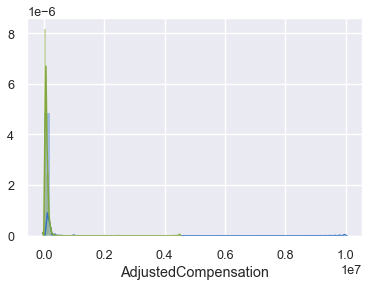

In [33]:
sns.distplot(df_bach.AdjustedCompensation)
sns.distplot(df_mast.AdjustedCompensation)

In [36]:
p_value_welch_ttest(df_bach.AdjustedCompensation, df_mast.AdjustedCompensation)

0.1813211861492845

In [38]:
for q in np.linspace(.8, 1, num=21):
    bach_q =  round(df_bach.AdjustedCompensation.quantile(q=q), 2)
    mast_q =  round(df_mast.AdjustedCompensation.quantile(q=q), 2)
    print(f'{round(q,2)}th percentile:\tset1: {bach_q}\tset2: {mast_q}')

0.8th percentile:	set1: 93233.13	set2: 103000.0
0.81th percentile:	set1: 95572.83	set2: 107009.0
0.82th percentile:	set1: 99276.38	set2: 110000.0
0.83th percentile:	set1: 100000.0	set2: 111503.83
0.84th percentile:	set1: 103040.0	set2: 115240.4
0.85th percentile:	set1: 105935.04	set2: 119582.6
0.86th percentile:	set1: 110000.0	set2: 120000.0
0.87th percentile:	set1: 112000.0	set2: 124719.88
0.88th percentile:	set1: 115000.0	set2: 129421.46
0.89th percentile:	set1: 120000.0	set2: 130000.0
0.9th percentile:	set1: 120346.5	set2: 135000.0
0.91th percentile:	set1: 126460.0	set2: 140000.0
0.92th percentile:	set1: 132615.4	set2: 149640.0
0.93th percentile:	set1: 140000.0	set2: 150000.0
0.94th percentile:	set1: 143408.8	set2: 160000.0
0.95th percentile:	set1: 150000.0	set2: 166778.6
0.96th percentile:	set1: 179849.74	set2: 180000.0
0.97th percentile:	set1: 195000.0	set2: 200000.0
0.98th percentile:	set1: 200000.0	set2: 211100.0
0.99th percentile:	set1: 250000.0	set2: 250000.0
1.0th percentile:

In [39]:
print('Repeated Test with Outliers Removed:')
print("Bachelor's vs. Master's")
outlier_threshold = 500000
df_bach_earn_reg = df_bach[df_bach.AdjustedCompensation <= outlier_threshold].AdjustedCompensation
df_mast_earn_reg = df_mast[df_mast.AdjustedCompensation <= outlier_threshold].AdjustedCompensation
print(f"Median Values: \tBachelor's: {round(df_bach_earn_reg.median(),2)} \tMaster's: {round(df_mast_earn_reg.median(),2)}")
print(f"Mean Values: \tBachelor's: {round(df_bach_earn_reg.mean(),2)} \tMaster's: {round(df_mast_earn_reg.mean(),2)}")
print(f"Sample sizes: \tBachelor's: {len(df_bach_earn_reg)} \tMaster's: {len(df_mast_earn_reg)}")
print(f"Welch's t-test p-value with outliers removed:", p_value_welch_ttest(df_bach_earn_reg, df_mast_earn_reg))


Repeated Test with Outliers Removed:
Bachelor's vs. Master's
Median Values: 	Bachelor's: 38292.15 	Master's: 53539.72
Mean Values: 	Bachelor's: 53744.35 	Master's: 63976.63
Sample sizes: 	Bachelor's: 1103 	Master's: 1985
Welch's t-test p-value with outliers removed: 4.4874583271514723e-07


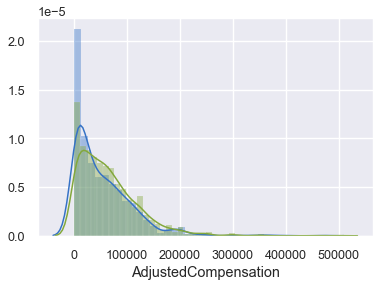

In [40]:
sns.distplot(df_bach_earn_reg)
sns.distplot(df_mast_earn_reg);

In [41]:
ttest_ind(df_bach_earn_reg, df_mast_earn_reg)

Ttest_indResult(statistic=-4.925048068668343, pvalue=8.877640800640276e-07)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [46]:
print("bachelor's:\n")
print(df_bach.AdjustedCompensation.describe())
print("\n---------------------\ndoctoral\n")
print(df_doc.AdjustedCompensation.describe())

bachelor's:

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

---------------------
doctoral

count    9.670000e+02
mean     2.956618e+07
std      9.099981e+08
min     -7.351631e+01
25%      4.000000e+04
50%      7.413192e+04
75%      1.200000e+05
max      2.829740e+10
Name: AdjustedCompensation, dtype: float64


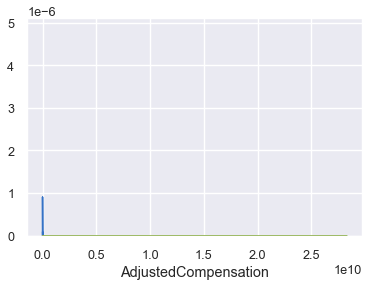

In [47]:
sns.distplot(df_bach.AdjustedCompensation)
sns.distplot(df_doc.AdjustedCompensation)

In [48]:
p_value_welch_ttest(df_bach.AdjustedCompensation, df_doc.AdjustedCompensation)

0.026862923061632626

In [50]:
for q in np.linspace(.8, 1, num=21):
    bach_q =  round(df_bach.AdjustedCompensation.quantile(q=q), 2)
    doc_q =  round(df_doc.AdjustedCompensation.quantile(q=q), 2)
    print(f"{round(q,2)}th percentile:\tbachelor's: {bach_q}\tdoctoral: {doc_q}")

0.8th percentile:	bachelor's: 93233.13	doctoral: 135000.0
0.81th percentile:	bachelor's: 95572.83	doctoral: 140000.0
0.82th percentile:	bachelor's: 99276.38	doctoral: 140000.0
0.83th percentile:	bachelor's: 100000.0	doctoral: 146796.17
0.84th percentile:	bachelor's: 103040.0	doctoral: 150000.0
0.85th percentile:	bachelor's: 105935.04	doctoral: 150000.0
0.86th percentile:	bachelor's: 110000.0	doctoral: 155000.0
0.87th percentile:	bachelor's: 112000.0	doctoral: 160000.0
0.88th percentile:	bachelor's: 115000.0	doctoral: 160000.0
0.89th percentile:	bachelor's: 120000.0	doctoral: 166480.0
0.9th percentile:	bachelor's: 120346.5	doctoral: 172057.78
0.91th percentile:	bachelor's: 126460.0	doctoral: 175000.0
0.92th percentile:	bachelor's: 132615.4	doctoral: 181555.2
0.93th percentile:	bachelor's: 140000.0	doctoral: 191900.0
0.94th percentile:	bachelor's: 143408.8	doctoral: 200000.0
0.95th percentile:	bachelor's: 150000.0	doctoral: 200000.0
0.96th percentile:	bachelor's: 179849.74	doctoral: 2209

In [51]:
print('Repeated Test with Outliers Removed:')
print("Bachelor's vs. Doctorate")
outlier_threshold = 500000
df_doc_earn_reg = df_doc[df_doc.AdjustedCompensation <= outlier_threshold].AdjustedCompensation
print(f"Median Values: \tBachelor's: {round(df_bach_earn_reg.median(),2)} \tDoctorate: {round(df_doc_earn_reg.median(),2)}")
print(f"Mean Values: \tBachelor's: {round(df_bach_earn_reg.mean(),2)} \tDoctorate: {round(df_doc_earn_reg.mean(),2)}")
print(f"Sample sizes: \tBachelor's: {len(df_bach_earn_reg)} \tDoctorate: {len(df_doc_earn_reg)}")
print(f"Welch's t-test p-value with outliers removed:", p_value_welch_ttest(df_bach_earn_reg, df_doc_earn_reg))


Repeated Test with Outliers Removed:
Bachelor's vs. Doctorate
Median Values: 	Bachelor's: 38292.15 	Doctorate: 73152.77
Mean Values: 	Bachelor's: 53744.35 	Doctorate: 86194.98
Sample sizes: 	Bachelor's: 1103 	Doctorate: 964
Welch's t-test p-value with outliers removed: 0.0


In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [55]:
#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'AdjustedCompensation ~ FormalEducation'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq      df         F    PR(>F)
FormalEducation  6.540294e+17     6.0  0.590714  0.738044
Residual         7.999414e+20  4335.0       NaN       NaN


In [56]:
temp = df[df.AdjustedCompensation <= outlier_threshold]

lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq      df          F        PR(>F)
FormalEducation  5.841881e+11     6.0  29.224224  1.727132e-34
Residual         1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!